# 代数计算

In [15]:
from sympy import init_printing,symbols,cos
x, y, z = symbols('x y z')
init_printing(use_unicode=True)

这部分将主要讲代数的计算和一些高数部分的运算符

## `diff()`微分(求导)

In [2]:
from sympy import diff

In [3]:
diff(x**3+x**2+x+1)

`diff(exp,var,level)`可以求多阶导数,需要指定变量和阶数

In [5]:
diff(x**3+x**2+x+1,x,2)

同样的,也可以求偏导

In [6]:
diff(x**3+x*y**2+x*y+1,x)

要创建未化简的的导数，请使用导数类。它具有与diff相同的语法,但必须显式的指定是谁的微分

In [7]:
from sympy import Derivative

In [10]:
exp = diff(x**3+x**2+x+1)
exp

In [11]:
Derivative(exp,x)

要计算导数类的实例,可以使用算式的`doit()`方法

In [12]:
Derivative(exp,x).doit()

##  `integrate(exp,var)`积分

In [13]:
from sympy import integrate

+ ### 不定积分

In [16]:
integrate(cos(x), x)

+ ### 定积分

定积分一般会有上下限,可以用元组(integration_variable, lower_limit, upper_limit)替换var

In [18]:
from sympy import oo,exp

$ \int _0^\infty e^{-x} dx$

In [19]:
integrate(exp(-x), (x, 0, oo))

+ ### 重积分

比如我们想求如下这个二重积分

$\int _{-\infty}^\infty \int _{-\infty}^\infty e^{-x^2-y^2} dx dy$

In [20]:
integrate(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

如果积分无法求得,那么它会返回原来的样子

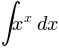

In [21]:
expr = integrate(x**x, x)
expr

就像微分一样,积分也有对应的类型Integral,定义方式也相似

In [24]:
from sympy import Integral,log

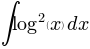

In [26]:
expr = Integral(log(x)**2, x)
expr 

In [27]:
expr.doit()

## 极限

SymPy可以使用limit函数计算极限。

In [30]:
from sympy import limit,sin

In [31]:
limit(sin(x)/x, x, 0)

In [32]:
expr = x**2/exp(x)
expr.subs(x, oo)

In [33]:
limit(expr, x, oo)

极限也有一个类,也和上面的微分积分差不多

In [34]:
from sympy import Limit

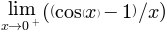

In [35]:
expr = Limit((cos(x) - 1)/x, x, 0)
expr

In [36]:
expr.doit()

## 泰勒展开

泰勒公式是一个用函数在某点的信息描述其附近取值的公式。如果函数足够平滑的话，在已知函数在某一点的各阶导数值的情况之下，泰勒公式可以用这些导数值做系数构建一个多项式来近似函数在这一点的邻域中的值。泰勒公式还给出了这个多项式和实际的函数值之间的偏差。

SymPy可以计算围绕一个点的函数做泰勒级数展开.它使用算式的`.series(x, x0, n)`方法,就像之前在验证欧拉公式时我们做的那样

In [37]:
expr = exp(sin(x))
expr

In [38]:
expr.series(x, 0, 4)

In [40]:
from sympy import symbols
x0 = symbols("x0")

In [42]:
expr.series(x, x0, 4)

                                                 ⎛   sin(x₀)            sin(x₀
 sin(x₀)             sin(x₀)                   2 ⎜  ℯ       ⋅sin(x₀)   ℯ      
ℯ        + (x - x₀)⋅ℯ       ⋅cos(x₀) + (x - x₀) ⋅⎜- ──────────────── + ───────
                                                 ⎝         2                  

)    2    ⎞             ⎛   sin(x₀)                    sin(x₀)    3        sin
 ⋅cos (x₀)⎟           3 ⎜  ℯ       ⋅sin(x₀)⋅cos(x₀)   ℯ       ⋅cos (x₀)   ℯ   
──────────⎟ + (x - x₀) ⋅⎜- ──────────────────────── + ───────────────── - ────
 2        ⎠             ⎝             2                       6               

(x₀)        ⎞                       
    ⋅cos(x₀)⎟    ⎛        4        ⎞
────────────⎟ + O⎝(x - x₀) ; x → x₀⎠
   6        ⎠                       

## 有限差异

到目前为止，我们分别用分析导数和原始函数来研究表达式。
但是如果我们想要一个表达式来估计曲线的导数，如果我们缺少一个闭合形式表示，或者我们还不知道函数值，那又怎么办呢？
一种方法是使用有限差分法。

您可以使用`as_finite_diff`方法在任何衍生实例上来生成任意阶导数的近似：

In [57]:
from sympy import Function,as_finite_diff,finite_diff_weights,apply_finite_diff

In [46]:
f = Function('f')
dfdx = f(x).diff(x)
dfdx

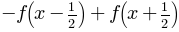

In [49]:
as_finite_diff(dfdx)

这里，我们使用步长为1,等距离估计的最小点数来近似函数对x的一阶导数。我们可以使用任意的步长

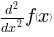

In [50]:
f = Function('f')
d2fdx2 = f(x).diff(x, 2)
d2fdx2

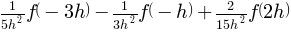

In [52]:
h = symbols('h')
as_finite_diff(d2fdx2, [-3*h,-h,2*h])

如果要评估权重,你可以手动计算

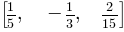

In [55]:
finite_diff_weights(2, [-3, -1, 2], 0)[-1][-1]

注意，我们只需要从finite_diff_weights返回的最后一个子列表中取最后一个元素。
这样做的原因是，finite_diff_weights产生较低阶导数的权重，并使用较少的点

如果使用finite_diff_weights直接看起来很复杂，并且觉得Derivative实例操作的as_finite_diff函数不够灵活，则可以使用apply_finite_diff，它接受order，x_list，y_list和x0作为参数

In [58]:
x_list = [-3, 1, 2]
y_list = symbols('a b c')
apply_finite_diff(1, x_list, y_list, 0)